In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset = pd.read_csv ("placement_1.csv")
dataset.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

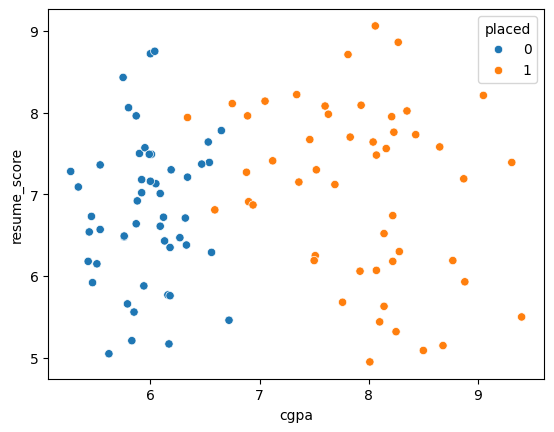

In [6]:
sns.scatterplot(data = dataset, x = "cgpa", y = "resume_score", hue = "placed")

In [8]:
x = dataset.iloc[:, :-1]
y = dataset["placed"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)

In [10]:
lr = LogisticRegression ()
lr.fit (x_train, y_train)

LogisticRegression()

In [ ]:
lr.score (x_test, y_test)*100

100.0

c:\Users\Aamir Neyazi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

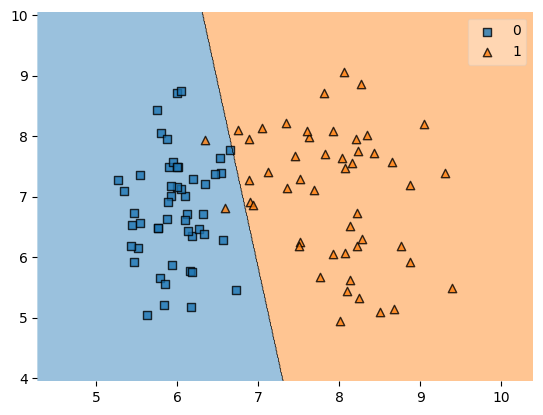

In [13]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)

In [20]:
# Assume 'x' is your original DataFrame with 2 columns
pf = PolynomialFeatures(degree=2)

# It's better to fit and transform in one step
transformed_data = pf.fit_transform(x)

# Get the new feature names
new_column_names = pf.get_feature_names_out(x.columns)

# Create the new DataFrame
x_poly = pd.DataFrame(transformed_data, columns=new_column_names)

# Now inspect your new DataFrame
print(x_poly.head())

     1    1  cgpa  resume_score   cgpa^2  cgpa resume_score  resume_score^2  \
0  1.0  1.0  8.14          6.52  66.2596            53.0728         42.5104   
1  1.0  1.0  6.17          5.17  38.0689            31.8989         26.7289   
2  1.0  1.0  8.27          8.86  68.3929            73.2722         78.4996   
3  1.0  1.0  6.88          7.27  47.3344            50.0176         52.8529   
4  1.0  1.0  7.52          7.30  56.5504            54.8960         53.2900   

   1^2  1 cgpa  1 resume_score  ...  resume_score^2  resume_score cgpa^2  \
0  1.0    8.14            6.52  ...         42.5104           432.012592   
1  1.0    6.17            5.17  ...         26.7289           196.816213   
2  1.0    8.27            8.86  ...         78.4996           605.961094   
3  1.0    6.88            7.27  ...         52.8529           344.121088   
4  1.0    7.52            7.30  ...         53.2900           412.817920   

   resume_score cgpa resume_score  resume_score resume_score^2     c

In [21]:
x_train, x_test, y_train, y_test = train_test_split (x_poly, y, test_size = 0.2, random_state = 42)